<a href="https://colab.research.google.com/github/Stormlocc/NoSQL-CompareQueryEmbebedReference/blob/main/atributoVStiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determinar relacion de consultas entre numero de atributos vs tiempos_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache_Cache en un diseno referencial y anidado

Utilizaremos el siguiente data set para realizar las pruebas de tiempo

In [2]:
#   https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

Agregamos los datos de manera referencial

In [3]:
import pymongo
import time

# Crear una conexión a la instancia de MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Seleccionar la base de datos en la que deseas insertar los documentos
db = client["ENEM_DB21_REF"]

# Colección para el primer documento
cAluno = db["aluno"]

# Colección para el segundo documento
cProva = db["prova"]

#i=1
inicio = time.time()
with open('MICRODADOS_ENEM_2021.csv', 'r', encoding='ISO-8859-1') as f:
    # Lê a primeira linha do arquivo CSV (cabeçalho)
    header = f.readline().strip().split(';')
    # Imprime o cabeçalho
    #print(header)
    # Lê cada linha do arquivo CSV
    for line in f:
        # Cria um dicionário com os valores das colunas na linha atual
        row = dict(zip(header, line.strip().split(';')))
        # Acessa os valores das colunas pelo nome da coluna
        prova = {  
            "TP_PRESENCA_CN": int(row["TP_PRESENCA_CN"]),      
            "TP_PRESENCA_CH": int(row["TP_PRESENCA_CH"]),
            "TP_PRESENCA_LC": int(row["TP_PRESENCA_LC"]),
            "TP_PRESENCA_MT": int(row["TP_PRESENCA_MT"]),
            "CO_PROVA_CN": int(row["CO_PROVA_CN"]) if row["CO_PROVA_CN"] else None,
            "CO_PROVA_CH": int(row["CO_PROVA_CH"]) if row["CO_PROVA_CH"] else None,
            "CO_PROVA_LC": int(row["CO_PROVA_LC"]) if row["CO_PROVA_LC"] else None,
            "CO_PROVA_MT": int(row["CO_PROVA_MT"]) if row["CO_PROVA_MT"] else 0,
            "NU_NOTA_CN": float(row["NU_NOTA_CN"]) if row["NU_NOTA_CN"] else 0,
            "NU_NOTA_CH": float(row["NU_NOTA_CH"]) if row["NU_NOTA_CH"] else 0,
            "NU_NOTA_LC": float(row["NU_NOTA_LC"]) if row["NU_NOTA_LC"] else 0,
            "NU_NOTA_MT": float(row["NU_NOTA_MT"]) if row["NU_NOTA_MT"] else 0,
            "TX_RESPOSTAS_CN": row["TX_RESPOSTAS_CN"],
            "TX_RESPOSTAS_CH": row["TX_RESPOSTAS_CH"],
            "TX_RESPOSTAS_LC": row["TX_RESPOSTAS_LC"],
            "TX_RESPOSTAS_MT": row["TX_RESPOSTAS_MT"],
            "TP_LINGUA": int(row["TP_LINGUA"]),
            "TX_GABARITO_CN": row["TX_GABARITO_CN"],
            "TX_GABARITO_CH": row["TX_GABARITO_CH"],
            "TX_GABARITO_LC": row["TX_GABARITO_LC"],
            "TX_GABARITO_MT": row["TX_GABARITO_MT"],
            #dados do local de aplicacao da prova
            "CO_MUNICIPIO_PROVA": int(row["CO_MUNICIPIO_PROVA"]),
            "NO_MUNICIPIO_PROVA": row["NO_MUNICIPIO_PROVA"],
            "CO_UF_PROVA": row["CO_UF_PROVA"],
            "SG_UF_PROVA": row["SG_UF_PROVA"],
            "DADOS:REDACAO": {
                "TP_STATUS_REDACAO": int(row["TP_STATUS_REDACAO"]) if row["TP_STATUS_REDACAO"] else None,
                "NU_NOTA_COMP1": int(row["NU_NOTA_COMP1"]) if row["NU_NOTA_COMP1"] else None,
                "NU_NOTA_COMP2": int(row["NU_NOTA_COMP2"]) if row["NU_NOTA_COMP2"] else None,
                "NU_NOTA_COMP3": int(row["NU_NOTA_COMP3"]) if row["NU_NOTA_COMP3"] else None,
                "NU_NOTA_COMP4": int(row["NU_NOTA_COMP4"]) if row["NU_NOTA_COMP4"] else None,
                "NU_NOTA_COMP5": int(row["NU_NOTA_COMP5"]) if row["NU_NOTA_COMP5"] else None,
                "NU_NOTA_REDACAO": int(row["NU_NOTA_REDACAO"]) if row["NU_NOTA_REDACAO"] else None
            }
        }
        
        # Insertar el documento 1 en la colección 1 de MongoDB y obtener el ID generado
        id_prova = cProva.insert_one(prova).inserted_id

        aluno = {
            "_id": row["NU_INSCRICAO"],
            "NU_ANO": int(row["NU_ANO"]),
            "TP_FAIXA_ETARIA": int(row["TP_FAIXA_ETARIA"]),
            "TP_SEXO": row["TP_SEXO"],
            "TP_ESTADO_CIVIL": int(row["TP_ESTADO_CIVIL"]),
            "TP_COR_RACA": int(row["TP_COR_RACA"]),
            "TP_NACIONALIDADE": int(row["TP_NACIONALIDADE"]),
            "TP_ST_CONCLUSAO": int(row["TP_ST_CONCLUSAO"]),
            "TP_ANO_CONCLUIU": int(row["TP_ANO_CONCLUIU"]),
            "TP_ESCOLA": int(row["TP_ESCOLA"]),
            "TP_ENSINO": int(row["TP_ENSINO"]) if row["TP_ENSINO"] else 0,
            "IN_TREINEIRO": int(row["IN_TREINEIRO"]),
            "DADOS_SOCIOECONOMICOS":{
                "Q001": row["Q001"],
                "Q002": row["Q002"],
                "Q003": row["Q003"],
                #Q4 y q5 son string pero en el diccionario indica numerico
                "Q004": row["Q004"],
                "Q005": row["Q005"],
                "Q006": row["Q006"],
                "Q007": row["Q007"],
                "Q008": row["Q008"],
                "Q009": row["Q009"],
                "Q010": row["Q010"],
                "Q011": row["Q011"],
                "Q012": row["Q012"],
                "Q013": row["Q013"],
                "Q014": row["Q014"],
                "Q015": row["Q015"],
                "Q016": row["Q016"],
                "Q017": row["Q017"],
                "Q018": row["Q018"],
                "Q019": row["Q019"],
                "Q020": row["Q020"],
                "Q021": row["Q021"],
                "Q022": row["Q022"],
                "Q023": row["Q023"],
                "Q024": row["Q024"],
                "Q025": row["Q025"],
            },
            "id_prova": id_prova
        }
        
         # Insertar el documento 2 en la colección 2 de MongoDB
        cAluno.insert_one(aluno)
        
        #print(i)
        #i = i+1

    # Cerrar la conexión a MongoDB
    client.close()

print("Exito")
fin = time.time()

print("Tiempo inicio:",inicio)
print("Tiempo fin:",fin)
print("Tiempo total:",(fin-inicio))


Exito
Tiempo inicio: 1693436659.6377218
Tiempo fin: 1693438054.5385764
Tiempo total: 1394.900854587555


Al parecer algunos atributos como nu_nota_cn reciben valores varios, sugieron utilizar otro campo, para corregir estoy guardando con un 0 utilizando un if else
Tambien los id estoy utilizando como string

Agregamos los datos de manera anidada

In [1]:
import pymongo
import time

# Crear una conexión a la instancia de MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Seleccionar la base de datos en la que deseas insertar los documentos
db = client["ENEM_DB21_ANI"]

#1
cAluno_prova = db["aluno_prova"]

#i=1
inicio = time.time()
with open('MICRODADOS_ENEM_2021.csv', 'r', encoding='ISO-8859-1') as f:
    # Lê a primeira linha do arquivo CSV (cabeçalho)
    header = f.readline().strip().split(';')
    # Imprime o cabeçalho
    #print(header)
    #print()
    # Lê cada linha do arquivo CSV
    for line in f:
        # Cria um dicionário com os valores das colunas na linha atual
        row = dict(zip(header, line.strip().split(';')))
        #print(row)
    
        # Acessa os valores das colunas pelo nome da coluna
        aluno_prova = { 
            "TP_PRESENCA_CN": int(row["TP_PRESENCA_CN"]),      
            "TP_PRESENCA_CH": int(row["TP_PRESENCA_CH"]),
            "TP_PRESENCA_LC": int(row["TP_PRESENCA_LC"]),
            "TP_PRESENCA_MT": int(row["TP_PRESENCA_MT"]),
            "CO_PROVA_CN": int(row["CO_PROVA_CN"]) if row["CO_PROVA_CN"] else None,
            "CO_PROVA_CH": int(row["CO_PROVA_CH"]) if row["CO_PROVA_CH"] else None,
            "CO_PROVA_LC": int(row["CO_PROVA_LC"]) if row["CO_PROVA_LC"] else None,
            "CO_PROVA_MT": int(row["CO_PROVA_MT"]) if row["CO_PROVA_MT"] else 0,
            "NU_NOTA_CN": float(row["NU_NOTA_CN"]) if row["NU_NOTA_CN"] else 0,
            "NU_NOTA_CH": float(row["NU_NOTA_CH"]) if row["NU_NOTA_CH"] else 0,
            "NU_NOTA_LC": float(row["NU_NOTA_LC"]) if row["NU_NOTA_LC"] else 0,
            "NU_NOTA_MT": float(row["NU_NOTA_MT"]) if row["NU_NOTA_MT"] else 0,
            "TX_RESPOSTAS_CN": row["TX_RESPOSTAS_CN"],
            "TX_RESPOSTAS_CH": row["TX_RESPOSTAS_CH"],
            "TX_RESPOSTAS_LC": row["TX_RESPOSTAS_LC"],
            "TX_RESPOSTAS_MT": row["TX_RESPOSTAS_MT"],
            "TP_LINGUA": int(row["TP_LINGUA"]),
            "TX_GABARITO_CN": row["TX_GABARITO_CN"],
            "TX_GABARITO_CH": row["TX_GABARITO_CH"],
            "TX_GABARITO_LC": row["TX_GABARITO_LC"],
            "TX_GABARITO_MT": row["TX_GABARITO_MT"],
            #dados do local de aplicacao da prova
            "CO_MUNICIPIO_PROVA": int(row["CO_MUNICIPIO_PROVA"]),
            "NO_MUNICIPIO_PROVA": row["NO_MUNICIPIO_PROVA"],
            "CO_UF_PROVA": row["CO_UF_PROVA"],
            "SG_UF_PROVA": row["SG_UF_PROVA"],
            "DADOS:REDACAO": {
                "TP_STATUS_REDACAO": int(row["TP_STATUS_REDACAO"]) if row["TP_STATUS_REDACAO"] else None,
                "NU_NOTA_COMP1": int(row["NU_NOTA_COMP1"]) if row["NU_NOTA_COMP1"] else None,
                "NU_NOTA_COMP2": int(row["NU_NOTA_COMP2"]) if row["NU_NOTA_COMP2"] else None,
                "NU_NOTA_COMP3": int(row["NU_NOTA_COMP3"]) if row["NU_NOTA_COMP3"] else None,
                "NU_NOTA_COMP4": int(row["NU_NOTA_COMP4"]) if row["NU_NOTA_COMP4"] else None,
                "NU_NOTA_COMP5": int(row["NU_NOTA_COMP5"]) if row["NU_NOTA_COMP5"] else None,
                "NU_NOTA_REDACAO": int(row["NU_NOTA_REDACAO"]) if row["NU_NOTA_REDACAO"] else None,
            
            #Aqui entran prova
            "NU_ANO": int(row["NU_ANO"]),
            "TP_FAIXA_ETARIA": int(row["TP_FAIXA_ETARIA"]),
            "TP_SEXO": row["TP_SEXO"],
            "TP_ESTADO_CIVIL": int(row["TP_ESTADO_CIVIL"]),
            "TP_COR_RACA": int(row["TP_COR_RACA"]),
            "TP_NACIONALIDADE": int(row["TP_NACIONALIDADE"]),
            "TP_ST_CONCLUSAO": int(row["TP_ST_CONCLUSAO"]),
            "TP_ANO_CONCLUIU": int(row["TP_ANO_CONCLUIU"]),
            "TP_ESCOLA": int(row["TP_ESCOLA"]),
            "TP_ENSINO": int(row["TP_ENSINO"]) if row["TP_ENSINO"] else 0,
            "IN_TREINEIRO": int(row["IN_TREINEIRO"]),
            "DADOS_SOCIOECONOMICOS":{
                "Q001": row["Q001"],
                "Q002": row["Q002"],
                "Q003": row["Q003"],
                #Q4 y q5 son string pero en el diccionario indica numerico
                "Q004": row["Q004"],
                "Q005": row["Q005"],
                "Q006": row["Q006"],
                "Q007": row["Q007"],
                "Q008": row["Q008"],
                "Q009": row["Q009"],
                "Q010": row["Q010"],
                "Q011": row["Q011"],
                "Q012": row["Q012"],
                "Q013": row["Q013"],
                "Q014": row["Q014"],
                "Q015": row["Q015"],
                "Q016": row["Q016"],
                "Q017": row["Q017"],
                "Q018": row["Q018"],
                "Q019": row["Q019"],
                "Q020": row["Q020"],
                "Q021": row["Q021"],
                "Q022": row["Q022"],
                "Q023": row["Q023"],
                "Q024": row["Q024"],
                "Q025": row["Q025"],
                }
            }
        }
         # Insertar el documento 2 en la colección 2 de MongoDB
        #cAluno.insert_one(aluno)
        cAluno_prova.insert_one(aluno_prova)
        #print(i)
        #i = i+1


    # Cerrar la conexión a MongoDB
    client.close()

print("Exito")
fin = time.time()

print("Tiempo inicio:",inicio)
print("Tiempo fin:",fin)
print("Tiempo total:",(fin-inicio))



Exito
Tiempo inicio: 1693438601.2298186
Tiempo fin: 1693439325.6014414
Tiempo total: 724.371622800827


Importamos las librerias

In [2]:
#liberias
from pymongo import MongoClient
import time

Conectamos al servidor local de la DB

In [3]:
# Conectarse al servidor local de MongoDB
client = MongoClient()

Almacenamos variables necesarias para las consultas

In [4]:
# Acceder a la base de datos "ENEM_DB21"
db = client.ENEM_DB21

# Acceder a la colección "aluno"
cAluno = db.aluno

cProva = db.prova

Creamos las consultas, (al momento de cargar los datos fue de forma cadena y para generar variedad de consultas parsearemos de string a numerico)

In [6]:
# Crear consulta, 

pipeline_ref3 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_FAIXA_ETARIA": 1,  "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]
pipeline_ref5 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "TP_FAIXA_ETARIA": 1,  "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ref7 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1,  "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_GABARITO_CH": 1 }}
]

pipeline_ref9 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1,  "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_RESPOSTAS_MT": 1, "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1 }}
]

pipeline_ref11 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1,  "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_RESPOSTAS_MT": 1, "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ref13 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1, "dados_prova.TX_RESPOSTAS_CN": 1, "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1, "dados_prova.TX_RESPOSTAS_MT": 1, "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ref15 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "TP_FAIXA_ETARIA": 1, "SG_UF_ESC": 1, "Q001": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1, "Q006": 1, "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1,  "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ref17 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "TP_FAIXA_ETARIA": 1, "SG_UF_ESC": 1, "Q001": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1, "Q006": 1, "Q007": 1, "dados_prova.TX_RESPOSTAS_CN": 1, "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1,  "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_ref19 = [
     {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
     {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
     {"$project":{"TP_SEXO": 1, "TP_FAIXA_ETARIA": 1,"TP_ANO_CONCLUIU":1, "TP_ENSINO":1 ,"SG_UF_ESC": 1, "Q001": 1, "Q002": 1, "Q003": 1, "Q004": 1, "Q005": 1, "Q006": 1, "Q007": 1, "dados_prova.TX_RESPOSTAS_CN": 1, "dados_prova.TX_RESPOSTAS_CH": 1, "dados_prova.TX_RESPOSTAS_LC": 1,  "dados_prova.TX_GABARITO_CN": 1, "dados_prova.TX_GABARITO_CH": 1, "dados_prova.TX_GABARITO_LC": 1, "dados_prova.TX_GABARITO_MT": 1 }}
]

pipeline_refAll = [
    {"$match": {"TP_FAIXA_ETARIA": {"$gte": 1, "$lte": 10}}},
    {"$lookup": {"from": "prova", "localField": "id_prova", "foreignField": "_id", "as": "dados_prova"}},
    #{"$project":{"_id": 1, "NU_ANO": 1, "TP_FAIXA_ETARIA": 1, "TP_SEXO": 1, "TP_ESTADO_CIVIL": 1, "TP_COR_RACA": 1, "TP_NACIONALIDADE": 1, "TP_ST_CONCLUSAO":1, "TP_ESCOLA": 1, "TP_ENSINO":1, "IN_TREINEIRO":1, "Q001":1, "Q002":1, "Q003":1,"Q004":1,"Q005":1,"Q006":1,"Q007":1,"Q008":1,"Q009":1,"Q010":1,"Q011":1,"Q012":1,"Q013":1,"Q014":1,"Q015":1,"Q016":1,"Q017":1,"Q018":1,"Q019":1,"Q020":1,"Q021":1,"Q021":1,"Q022":1,"Q022":1,"Q023":1,"Q024":1,"Q025":1 "dados_prova.CO_MUNICIPIO_PROVA": 1, "dados_prova.NO_MUNICIPIO_PROVA": 1, "dados_prova.TP_PRESENCA_CN": 1, "dados_prova.TP_PRESENCA_CH": 1, "dados_prova.TP_PRESENCA_LC": 1, "dados_prova.TP_PRESENCA_MT": 1 }}
]

consultas_referenciales = [ pipeline_ref3, pipeline_ref5, pipeline_ref7, pipeline_ref9, pipeline_ref11, pipeline_ref13, pipeline_ref15, pipeline_ref17, pipeline_ref19, pipeline_refAll]
print("Cantidad de variedad de consultas:",len(consultas_referenciales))

Cantidad de variedad de consultas: 10


In [7]:
#Diccionario: nroAtriburo:nombre
dic_atributos = {
    3:"3 atributos",
    5:"5 atributos",
    7:"7 atributos",
    9:"9 atributos",
    11:"11 atributos",
    13:"13 atributos",
    15:"15 atributos",
    17:"17 atributos",
    19:"19 atributos",
    33:"33 atributos"
}

Ejecutamos la consulta midiento el tiempo y sobreescribimos en un archivo csv

In [8]:
import numpy as np

#Cantidad de repeticiones sobre todas las consultas
iteraciones = 70
archivo_csv_cache= 'datosTiempo_conCache.csv'
#matriz que almacena todas las iteraciones segun las variedades de consultas
tiempos_Cache=[]

for j in range(iteraciones):
    tiempo = []
    for i, pipeline_ref in enumerate(consultas_referenciales):
        # calculando tempos
        start_time_ref = time.time()
        resultados_ref = db.aluno.aggregate(pipeline_ref)
        end_time_ref = time.time()

        tempo_execucao_ref = (end_time_ref - start_time_ref)*1000
        tiempo.append(tempo_execucao_ref)
    tiempos_Cache.append(tiempo)

#Convertimos la matriz a formato numpy
tiempos_Cache = np.array(tiempos_Cache)

#Guardamos en el archivo
with open(archivo_csv_cache, 'a') as archivo:
    np.savetxt(archivo, tiempos_Cache, delimiter=',')

print(tiempos_Cache)


[[2.39753723 0.43678284 0.35786629 0.3516674  0.3683567  0.36072731
  0.36501884 0.3991127  0.38051605 0.27513504]
 [0.30303001 0.31065941 0.31423569 0.31876564 0.33664703 0.33760071
  0.33807755 0.34570694 0.3554821  0.26249886]
 [0.29659271 0.30446053 0.30589104 0.31685829 0.32091141 0.32973289
  0.49638748 0.36263466 0.35691261 0.25868416]
 [0.29110909 0.30398369 0.31089783 0.31995773 0.3247261  0.33116341
  0.33783913 0.34761429 0.34880638 0.25391579]
 [0.28753281 0.30207634 0.3015995  0.30970573 0.32019615 0.32544136
  0.33712387 0.34356117 0.34356117 0.25081635]
 [0.29373169 0.31137466 0.30112267 0.31089783 0.31995773 0.33903122
  0.33378601 0.3528595  0.34570694 0.24390221]
 [0.27441978 0.29373169 0.29420853 0.2989769  0.32520294 0.33259392
  0.32615662 0.33974648 0.37264824 0.35691261]
 [0.31256676 0.33926964 0.34618378 0.33926964 0.35333633 0.3554821
  0.33807755 0.33116341 0.33545494 0.23961067]
 [0.48661232 0.31447411 0.28395653 0.2913475  0.92864037 0.41437149
  0.32806396 

Ejecutamos la consulta eliminando el cache y medimos el tiempo

In [9]:
import numpy as np

#Cantidad de repeticiones sobre todas las consultas
iteraciones = 50
archivo_csv_sinCache= 'datosTiempo_sinCache.csv'
#matriz que almacena todas las iteraciones segun las variedades de consultas
tiempos_sinCache=[]

for j in range(iteraciones):
    tiempo = []
    for i, pipeline_ani in enumerate(consultas_referenciales):
        
        # Ejecutar planCacheClear()
        db.command('planCacheClear', 'aluno')
        '''
        resultados_ref = db.command('planCacheClear', 'aluno')
        if resultados_ref['ok'] != 1.0:
            print('Error al borrar la caché de planes:', resultados_ref['errmsg'])
            break
        '''
        
        # calculando tempos
        start_time_ref = time.time()
        resultados_ref = db.aluno.aggregate(pipeline_ani)
        end_time_ref = time.time()

        tempo_execucao_ref = (end_time_ref - start_time_ref)*1000
        tiempo.append(tempo_execucao_ref)
    tiempos_sinCache.append(tiempo)

#Convertimos la matriz a formato numpy
tiempos_sinCache = np.array(tiempos_sinCache)

#Guardamos en el archivo
with open(archivo_csv_sinCache, 'a') as archivo:
    np.savetxt(archivo, tiempos_sinCache, delimiter=',')

print(tiempos_sinCache)

[[0.87976456 0.34666061 0.27799606 0.35214424 0.3657341  0.27298927
  0.37264824 0.30851364 0.33640862 0.23889542]
 [0.26631355 0.36644936 0.2849102  0.41055679 0.39052963 0.38409233
  0.35762787 0.47469139 0.48446655 0.28634071]
 [0.24724007 0.32758713 0.63467026 0.83446503 0.94246864 0.75554848
  0.4336834  0.49591064 0.41270256 0.21624565]
 [0.24056435 0.3991127  0.44250488 0.22721291 0.26702881 0.45013428
  0.32067299 0.27489662 0.28944016 0.22530556]
 [0.19884109 0.21529198 0.37646294 0.31805038 0.2989769  0.50401688
  0.29110909 0.23150444 0.24747849 0.24843216]
 [0.50806999 0.22149086 0.23818016 0.26726723 0.29635429 0.26702881
  0.25200844 0.52523613 0.40507317 0.25653839]
 [0.32520294 0.22220612 0.32925606 0.42843819 0.43606758 0.70858002
  0.71763992 0.37336349 0.5698204  0.40435791]
 [0.87976456 0.33092499 0.35715103 0.40054321 0.30875206 0.30517578
  0.29230118 0.30016899 0.4401207  0.25415421]
 [0.29182434 0.31328201 0.27775764 0.54788589 0.52809715 0.52165985
  0.30064583

Abrimos el archivos y guardamos en una nueva matriz

In [10]:
import csv
import numpy as np

print("Cantidad de tiempos cache iniciales",len(tiempos_Cache))

matriz = []

with open(archivo_csv_cache, 'r') as archivo:
    lector_csv = csv.reader(archivo)
    for fila in lector_csv:
        fila_numeros = np.array(fila, dtype=np.float64)
        matriz.append(fila_numeros)

tiempos_Cache = np.array(matriz)

print("Cantidad de tiempos cache actual - leidos de archivo",len(tiempos_Cache))


Cantidad de tiempos cache iniciales 70
Cantidad de tiempos cache actual - leidos de archivo 70


In [11]:
import csv
import numpy as np

print("Cantidad de tiempos sin Cache iniciales",len(tiempos_sinCache))

matriz = []

with open(archivo_csv_sinCache, 'r') as archivo:
    lector_csv = csv.reader(archivo)
    for fila in lector_csv:
        fila_numeros = np.array(fila, dtype=np.float64)
        matriz.append(fila_numeros)

tiempos_sinCache = np.array(matriz)

print("Cantidad de tiempos actual sin Cache - leidos de archivo",len(tiempos_sinCache))

Cantidad de tiempos sin Cache iniciales 50
Cantidad de tiempos actual sin Cache - leidos de archivo 50


Promediamos los tiempos

In [12]:
import numpy as np
promedio_tiempos_cache = np.mean(tiempos_Cache, axis=0)
print("cache promedios",promedio_tiempos_cache)
promedio_tiempos_sinCache = np.mean(tiempos_sinCache, axis=0)
print("sin cache promedios",promedio_tiempos_sinCache)


cache promedios [0.29169151 0.26482173 0.27601719 0.26919501 0.28167112 0.27794497
 0.28020654 0.28385435 0.2937964  0.22522381]
sin cache promedios [0.26866913 0.24942398 0.26222706 0.27492523 0.30288696 0.30748844
 0.31061172 0.29290199 0.29693604 0.23258686]


Dataset de los tiempos de consulta

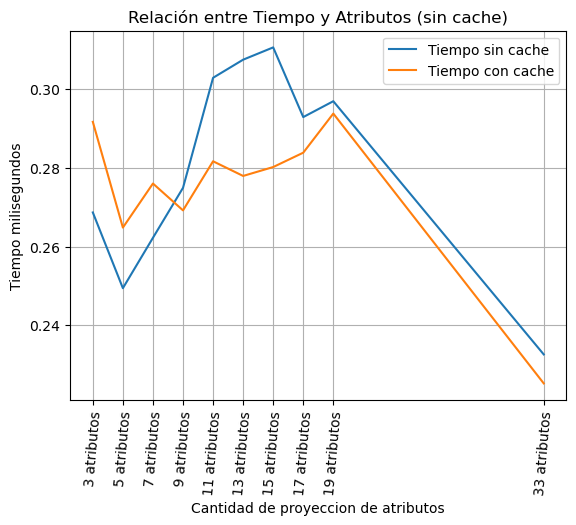

In [13]:
import matplotlib.pyplot as plt

atributos = list(dic_atributos.keys())
atributos_name = list(dic_atributos.values())

plt.plot(atributos, promedio_tiempos_sinCache,label="Tiempo sin cache")
plt.plot(atributos, promedio_tiempos_cache,label="Tiempo con cache")
plt.xlabel('Cantidad de proyeccion de atributos')
plt.ylabel('Tiempo milisegundos')
plt.xticks(atributos,atributos_name,rotation=85)
plt.title('Relación entre Tiempo y Atributos (sin cache)')
plt.legend()
plt.grid()
plt.show()